## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP1 - Exploración de los datos

---

En esta libreta se realiza un EDA -básico- de los datos del escenario. 

---

##### Importación de librerías

In [1]:
import pandas as pd
# from ydata_profiling import ProfileReport
import dtale as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

----

##### Lectura de los datasets

In [2]:
df_creditos = pd.read_csv("../../data/raw/datos_creditos.csv", sep=";")
df_creditos.head(1)

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago
0,713061558.0,22,35000,3,123.0,ALQUILER,59000,PERSONAL,0.59,16.02,1,Y


In [3]:
df_tarjetas = pd.read_csv("../../data/raw/datos_tarjetas.csv", sep=";")
df_tarjetas.head(1)

,id_cliente,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,713061558.0,36.0,CASADO,ACTIVO,1088.0,M,4010.0,UNIVERSITARIO_COMPLETO,Blue,24.0,2.0


----

##### Descripción de los datasets

In [4]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

In [5]:
print("Descripción del dataset 'datos_creditos'")
reporte_descripcion_dataset(df_creditos)

Descripción del dataset 'datos_creditos'
Columnas del dataset:

id_cliente
edad
importe_solicitado
duracion_credito
antiguedad_empleado
situacion_vivienda
ingresos
objetivo_credito
pct_ingreso
tasa_interes
estado_credito
falta_pago

Cantidad de filas: 10127


In [6]:
print("Descripción del dataset 'datos_tarjetas'")
reporte_descripcion_dataset(df_tarjetas)

Descripción del dataset 'datos_tarjetas'
Columnas del dataset:

id_cliente
antiguedad_cliente
estado_civil
estado_cliente
gastos_ult_12m
genero
limite_credito_tc
nivel_educativo
nivel_tarjeta
operaciones_ult_12m
personas_a_cargo

Cantidad de filas: 10127


----

##### Obtención de metadatos

In [6]:
# Se usa la librería dtale para poder obtener una vista interactiva de los datos

# Dataset: datos_creditos

creditos = dt.show(df_creditos)
creditos.open_browser()

2024-07-12 11:28:58,268 - INFO     - Executing shutdown due to inactivity...
2024-07-12 12:44:01,240 - ERROR    - Exception occurred while processing request: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Traceback (most recent call last):
  File "c:\Users\HP\13MBID-OCT2324\venv\Lib\site-packages\dtale\views.py", line 120, in _handle_exceptions
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\13MBID-OCT2324\venv\Lib\site-packages\dtale\views.py", line 3168, in get_column_analysis
    return jsonify(**analysis.build())
                     ^^^^^^^^^^^^^^^^
  File "c:\Users\HP\13MBID-OCT2324\venv\Lib\site-packages\dtale\column_analysis.py", line 141, in build
    return_data, code = self.analysis.build(self)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\13MBID-OCT2324\venv\Lib\site-packages\dtale\column_analysis.py", l

In [7]:
# Dataset: datos_tarjetas

tarjetas = dt.show(df_tarjetas)
tarjetas.open_browser()

2024-07-12 13:15:50,048 - ERROR    - Exception occurred while processing request: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Traceback (most recent call last):
  File "c:\Users\HP\13MBID-OCT2324\venv\Lib\site-packages\dtale\views.py", line 120, in _handle_exceptions
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\13MBID-OCT2324\venv\Lib\site-packages\dtale\views.py", line 3168, in get_column_analysis
    return jsonify(**analysis.build())
                     ^^^^^^^^^^^^^^^^
  File "c:\Users\HP\13MBID-OCT2324\venv\Lib\site-packages\dtale\column_analysis.py", line 141, in build
    return_data, code = self.analysis.build(self)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\13MBID-OCT2324\venv\Lib\site-packages\dtale\column_analysis.py", line 185, in build
    return_data, hist_labels = self.build_histogram_data(
 

----

##### Gráficos de interés

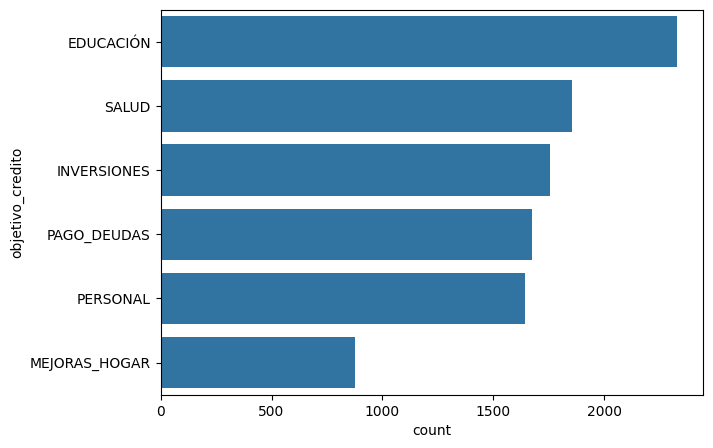

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(y=df_creditos['objetivo_credito'], order=df_creditos['objetivo_credito'].value_counts().index)
plt.show()

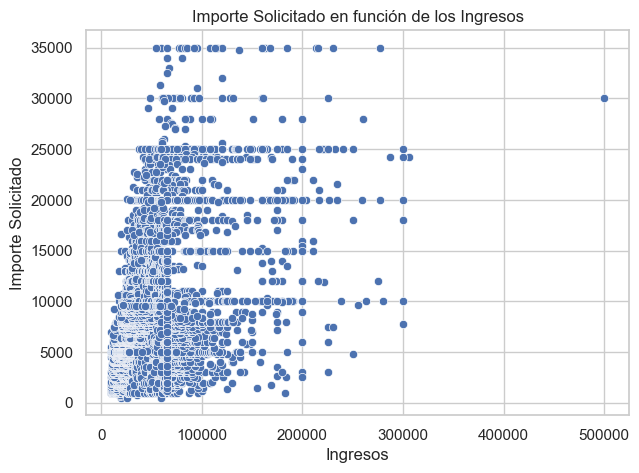

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_creditos, x='ingresos', y='importe_solicitado')

# Configurar las etiquetas y el título
plt.xlabel('Ingresos')
plt.ylabel('Importe Solicitado')
plt.title('Importe Solicitado en función de los Ingresos')

# Mostrar el gráfico
plt.show()


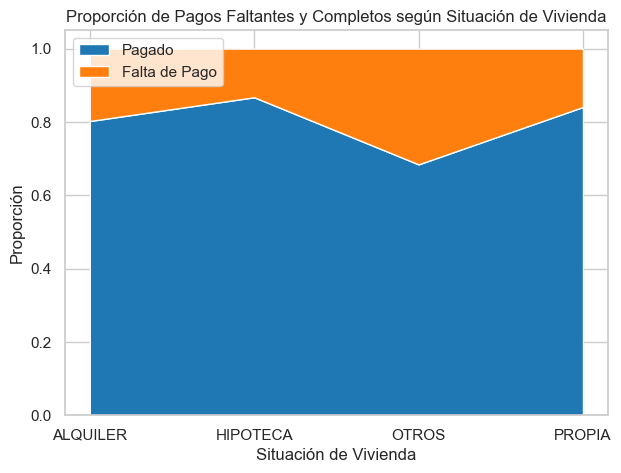

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Crear la tabla de contingencia
contingency_table = pd.crosstab(df_creditos['situacion_vivienda'], df_creditos['falta_pago'], normalize='index')
contingency_table.columns = ['Pagado', 'Falta de Pago']
contingency_table.reset_index(inplace=True)

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de áreas
plt.figure(figsize=(7, 5))

# Gráfico de áreas apiladas
plt.stackplot(contingency_table['situacion_vivienda'], 
              contingency_table['Pagado'], 
              contingency_table['Falta de Pago'], 
              labels=['Pagado', 'Falta de Pago'], 
              colors=['#1f77b4', '#ff7f0e'])

# Configurar las etiquetas y el título
plt.xlabel('Situación de Vivienda')
plt.ylabel('Proporción')
plt.title('Proporción de Pagos Faltantes y Completos según Situación de Vivienda')
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()

